# 2.KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


Recurrentレイヤー - Keras Documentation

# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras/imdb_lstm.py at master · keras-team/keras


ConvLSTM2Dのサンプルコード


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [5]:
from __future__ import print_function
from keras import backend as K
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import SimpleRNN

In [36]:
#データセット


max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [37]:
%%time
K.clear_session()
tf.reset_default_graph()#データグラフをリセット

#SimpleRNN
from keras.layers import SimpleRNN
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.6875 - accuracy: 0.5418 - val_loss: 0.6606 - val_accuracy: 0.5795
Epoch 2/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.5645 - accuracy: 0.7010 - val_loss: 0.5340 - val_accuracy: 0.7346
Epoch 3/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4617 - accuracy: 0.7923 - val_loss: 0.5173 - val_accuracy: 0.7458
Epoch 4/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.4115 - accuracy: 0.8256 - val_loss: 0.5379 - val_accuracy: 0.7345
Epoch 5/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4269 - accuracy: 0.8110 - val_loss: 0.5350 - val_accuracy: 0.7502
Epoch 6/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.3733 - accuracy:

In [38]:
%%time
K.clear_session()
tf.reset_default_graph()#データグラフをリセット


#GRU
from keras.layers import GRU
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 74s 3ms/step - loss: 1.0702 - accuracy: 0.6917 - val_loss: 0.5631 - val_accuracy: 0.7018
Epoch 2/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.4748 - accuracy: 0.7798 - val_loss: 0.5562 - val_accuracy: 0.7102
Epoch 3/10
25000/25000 [==============================] - 74s 3ms/step - loss: 1.1762 - accuracy: 0.8008 - val_loss: 0.5819 - val_accuracy: 0.6950
Epoch 4/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.3709 - accuracy: 0.8372 - val_loss: 0.5952 - val_accuracy: 0.7022
Epoch 5/10
25000/25000 [==============================] - 78s 3ms/step - loss: 0.3383 - accuracy: 0.8550 - val_loss: 0.6031 - val_accuracy: 0.7073
Epoch 6/10
25000/25000 [==============================] - 82s 3ms/step - loss: 0.3401 - accuracy: 0.8586 - val_loss: 0.6235 - val_accuracy: 0.7050
Epoch 7/10
25000/25000 [====================

In [39]:
%%time
K.clear_session()
tf.reset_default_graph()#データグラフをリセット

#LSTM
from keras.layers import SimpleRNN
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.4607 - accuracy: 0.7794 - val_loss: 0.4281 - val_accuracy: 0.8139
Epoch 2/10
25000/25000 [==============================] - 92s 4ms/step - loss: 0.3056 - accuracy: 0.8750 - val_loss: 0.4014 - val_accuracy: 0.8203
Epoch 3/10
25000/25000 [==============================] - 93s 4ms/step - loss: 0.2182 - accuracy: 0.9164 - val_loss: 0.4117 - val_accuracy: 0.8180
Epoch 4/10
25000/25000 [==============================] - 86s 3ms/step - loss: 0.1562 - accuracy: 0.9428 - val_loss: 0.4883 - val_accuracy: 0.8232
Epoch 5/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.1142 - accuracy: 0.9581 - val_loss: 0.5663 - val_accuracy: 0.8218
Epoch 6/10
25000/25000 [==============================] - 88s 4ms/step - loss: 0.0885 - accuracy: 0.9687 - val_loss: 0.6196 - val_accuracy: 0.8176
Epoch 7/10
25000/25000 [====================

acc:<br>
LSTM( 0.816) > SimpleRNN(0.743) > GRU(0.679)

time:<br>
SimpleRNN(5min 47s) > GRU(13min 8s) > LSTM(15min 14s) 

Train on 475 samples, validate on 25 samples
Epoch 1/10
475/475 [==============================] - 368s 774ms/step - loss: 0.3916 - val_loss: 0.6556
Epoch 2/10
475/475 [==============================] - 390s 821ms/step - loss: 0.0675 - val_loss: 0.7150
Epoch 3/10
475/475 [==============================] - 414s 871ms/step - loss: 0.0447 - val_loss: 0.4411
Epoch 4/10
475/475 [==============================] - 397s 836ms/step - loss: 0.0132 - val_loss: 0.4325
Epoch 5/10
475/475 [==============================] - 392s 825ms/step - loss: 0.0062 - val_loss: 0.3903
Epoch 6/10
475/475 [==============================] - 400s 841ms/step - loss: 0.0033 - val_loss: 0.3755
Epoch 7/10
475/475 [==============================] - 398s 837ms/step - loss: 0.0017 - val_loss: 0.4265
Epoch 8/10
475/475 [==============================] - 382s 804ms/step - loss: 0.0012 - val_loss: 0.4631
Epoch 9/10
475/475 [==============================] - 384s 809ms/step - loss: 8.8158e-04 - val_loss: 0.4364
Epoch 10/10
475

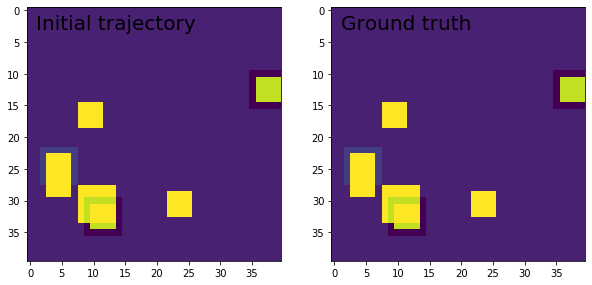

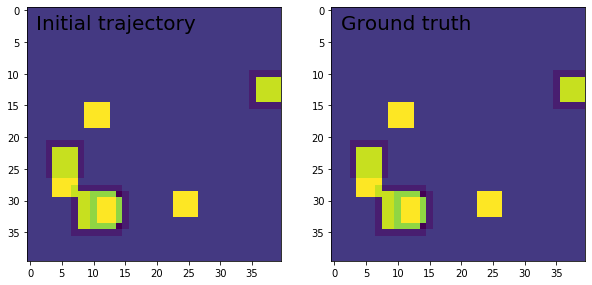

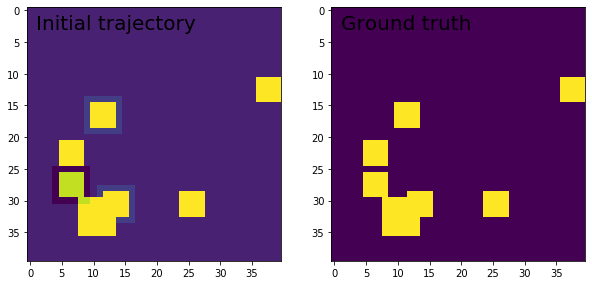

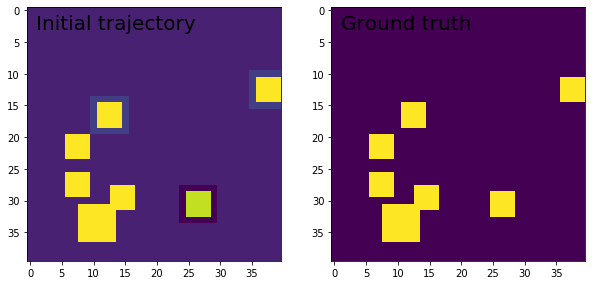

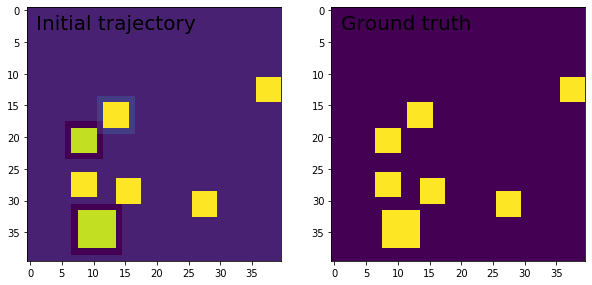

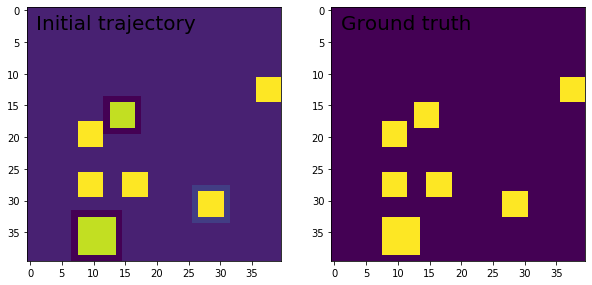

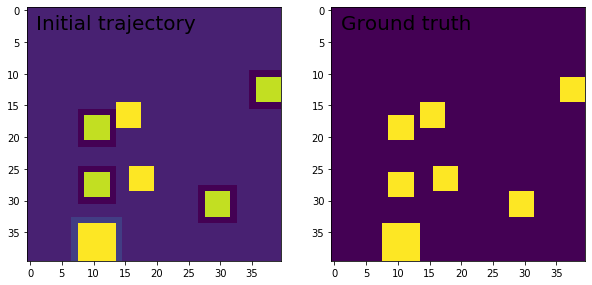

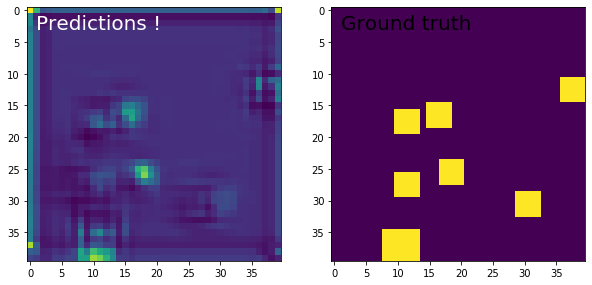

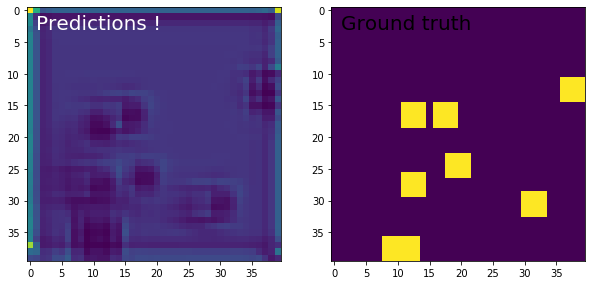

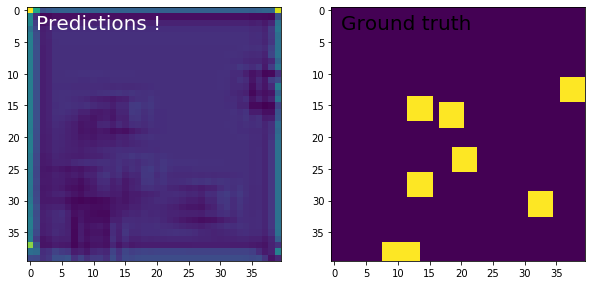

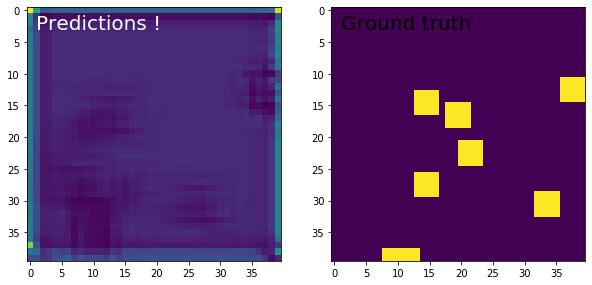

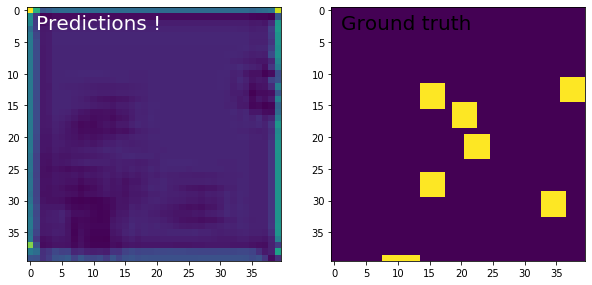

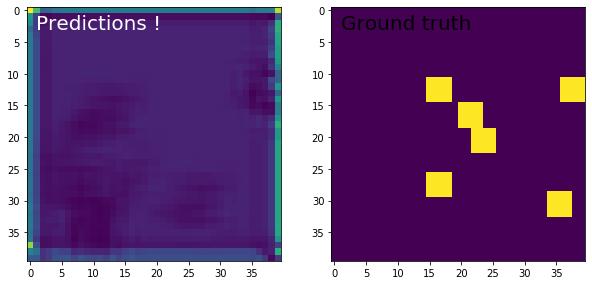

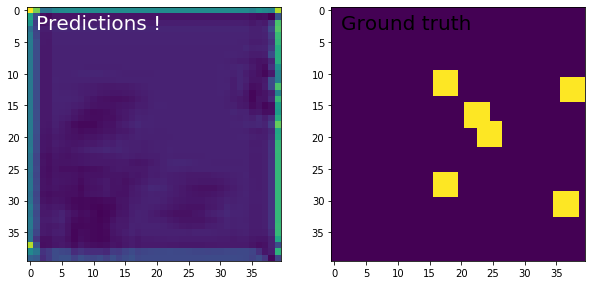

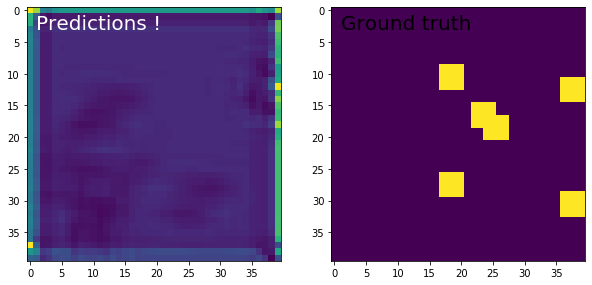

In [48]:
#ConvLSTM2D

from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:500], shifted_movies[:500], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


データセット - Keras Documentation


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [6]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.layers import Dropout, Activation
from keras.preprocessing.text import Tokenizer

In [7]:
#reuters.load_data で引数 num_words = 1000 とすることで、頻出上位１０００位までの単語のみの数字データで読み込み、
#１０００位以上の単語は「２」（該当単語無し）として読み込み
 
max_words = 1000
batch_size = 32
epochs = 5
 
print('Loading data...')
# 頻出上位1000位までの単語を対象に読み込む。データは学習：評価＝８：２とする。
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')  # 学習データの個数を表示
print(len(x_test), 'test sequences')  #  評価データの個数を表示
 
num_classes = np.max(y_train) + 1  # クラス数を計算
print(num_classes, 'classes')  # クラス数を表示

Loading data...
8982 train sequences
2246 test sequences
46 classes


In [9]:
#データ数を揃え、Tokenizer を使ってベクトル化する

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
 
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [10]:
%%time
#SimpleRNN

print('Building model...')
model = Sequential()
model.add(Embedding(8892, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()  # display model summary 
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Building model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1138176   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 46)                2990      
_________________________________________________________________
activation_4 (Activation)    (None, 

In [32]:
%%time
#GRU

print('Building model...')
model = Sequential()
model.add(Embedding(8892, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()  # display model summary 
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Building model...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         1138176   
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 46)                2990      
_________________________________________________________________
activation_12 (Activation)   (None, 

In [31]:
%%time
#LSTM

print('Building model...')
model = Sequential()
model.add(Embedding(8892, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()  # display model summary 
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1,)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Building model...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         1138176   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                2990      
_________________________________________________________________
activation_10 (Activation)   (None, 

acc:<br>
LSTM( 0.362) >= SimpleRNN(0.362) > GRU(0.005)

time:<br>
SimpleRNN(3min 36s) > GRU(10min 45s) > LSTM(10min 51s) 

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


* RNN
* SimpleRNNCell
* GRUCell
* LSTMCell
* StackedRNNCells
* CuDNNGRU
* CuDNNLSTM

### [RNN(Recurrent Neural Network)]

Recurrentレイヤーに対する基底クラス

ある層の出力を別の層の入力として利用するような再帰的構造を持ったニューラルネットワーク.

RNNのメリットは、独立した各時点での情報だけでなく前後の時系列情報を活用することができること。

RNNのデメリットは、直前の中間出力のみを使うため長期の時系列情報をうまく学習することができない点。


### [LSTM(Long Short-Term Memory)]

長短期記憶ユニット

RNNのデメリットであった長期の時系列情報を考慮することで長期的な依存関係の学習を可能にしたRNNの派生モデル。

LSTMのメリットは長期間記憶を保持することで長期的な依存関係を考慮して回帰を実現できる点にある。

### [GRU (Gated Recurrent Unit)]
 
 ゲートのあるリカレントユニット
 
 LSTMの忘却ゲートと入力ゲートを単一の更新ゲートにマージし隠れ状態のみを伝達していくニューラルネットワークのモデル。

==========================================================================================================

### Cellクラス
出力の次元をリストにまとめてRNNに組み込む

➡︎自分でRNNの処理をカスタマイズできる。

### SimpleRNNCell

SimpleRNNのCellクラス

### GRUCell

GRUレイヤーのためのCellクラス

### LSTMCell

LSTMレイヤーのためのcellクラス

### StackedRNNCells

RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われる

==========================================================================================================

### CuDNNGRU

CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作する．

### CuDNNLSTM

CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作する．